In [56]:
import numpy as np
from flatland.envs.rail_env import RailEnv
from flatland.envs.rail_generators import random_rail_generator,sparse_rail_generator,rail_from_manual_specifications_generator
from flatland.envs.rail_env import RailEnvActions

import PIL
from flatland.utils.rendertools import RenderTool
import IPython

In [57]:
specs = [[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)],
         [(0, 0), (0, 0), (0, 0), (0, 0), (7, 0), (0, 0)],
         [(7, 270), (1, 90), (1, 90), (1, 90), (2, 90), (7, 90)],
         [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]]

rail_shape = np.array(specs).shape
rail_shape

(4, 6, 2)

In [58]:
env = RailEnv(
    width=rail_shape[1],
    height=rail_shape[0],
    rail_generator=rail_from_manual_specifications_generator(specs),
    number_of_agents=1
)

observations, info = env.reset()



In [59]:
# Render the environment
def render_env(env):
    env_renderer = RenderTool(env, gl="PILSVG")
    env_renderer.render_env()

    image = env_renderer.get_image()
    pil_image = PIL.Image.fromarray(image)
    display(pil_image)


In [60]:
class MyController:
    def __init__(self, action_size):
        self.action_size = action_size

    def act(self, observations):
        actions = dict()
        for agent_handle, observation in enumerate(observations):
            action =np.random.randint(self.action_size)
            
            actions.update({agent_handle: action})
        return actions

In [61]:
from IPython.display import clear_output

# The environment provides a gym-like interface.
def run_episode(env):
    controller = MyController(env.action_space[0])
    observations, info = env.reset()
    
    score = 0
    actions = dict()
    taken_actions=[]
    for step in range(50):
        clear_output(wait=True)
        render_env(env)


        actions = controller.act(observations)

        observations, all_rewards, dones, _ = env.step(actions)

        for agent_handle in env.get_agent_handles():
            score += all_rewards[agent_handle]
        taken_actions.append(actions[0])
        
        print('current action {}'.format(RailEnvActions.to_char(actions[0])))
        print('Timestep {}, total score = {}'.format(step, score))
        time.sleep(2)
        render_env(env)
        time.sleep(3)
        print("my state")
        print(observations[0][1][:,:,0])
        time.sleep(2)
        print("my speed")


        print(observations[0][1][:,:,3])

        time.sleep(3)


        if dones['__all__']:
            print('All done!')
            return

    print("Episode didn't finish after 50 timesteps.")

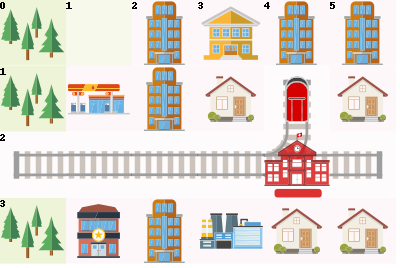

current action R
Timestep 1, total score = 0.0


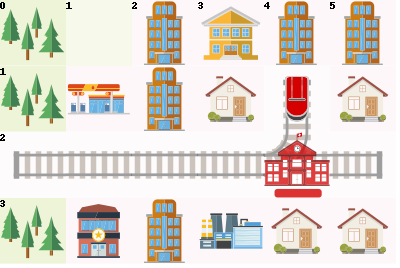

my state


TypeError: 'NoneType' object is not subscriptable

In [62]:
run_episode(env)

